In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("spam_ham_dataset.csv")

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


Let us remove the columns Unnamed: 0 and label since we only need text and if its spam or not

In [5]:
df.drop(["Unnamed: 0", "label"], axis="columns", inplace=True)

In [6]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
df.shape

(5171, 2)

Now we need to build a pipeline:
1) The first step is to convert the text data into numerical data. For that we need to use the count vectoriser  
2) Then, we have use multinomial naive bayes algorithm to build the spam filter

In [8]:
X = df["text"].values
Y = df["label_num"].values

In [9]:
pipeline = Pipeline([
    ("1", CountVectorizer()),
    ("2", MultinomialNB())
]
)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('1', CountVectorizer()), ('2', MultinomialNB())])

In [12]:
pipeline.score(X_test, Y_test)

0.9816425120772947

In [13]:
cross_val_score(pipeline, X, Y, cv=10).mean()

0.9787286319201213

In [14]:
#Lets look at the confusion matrix
y_pred = pipeline.predict(X_test)

In [15]:
cm = confusion_matrix(Y_test, y_pred)

<AxesSubplot:>

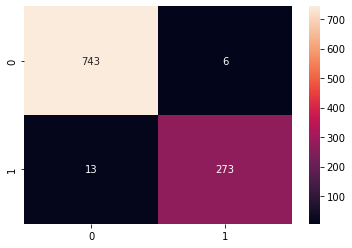

In [16]:
sns.heatmap(cm, annot=True, fmt='g')

In [18]:
with open("model", "wb") as file:
    pickle.dump(pipeline, file)

In [19]:
with open("model", "rb") as file:
    m = pickle.load(file)